In [ ]:
#------- Module 4 Assignment ---------#
# Submitted By: Muhammad Farez Omair Khan
# Std id : 155108
# Course : BAN 6800
# Date : 08/03/2025

## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Loading the dataset
file_path = "C:/Users/Farez Laptop/Dropbox/My PC (DESKTOP-0DN7O4V)/Desktop/Capstone Project/cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Displaying first few rows
df.head()


,vix,sp500,sp500_volume,djia,djia_volume,hsi,ads,us3m,joblessness,epu,GPRD,prev_day,sp500_7d_ma,sp500_30d_ma,sp500_volatility,prev_day_price
0,18.19,358.760010,19.074723,2809.73,23.62,2858.699951,-0.229917,7.89,3,100.359178,75.408051,359.690002,352.268577,336.744667,4.115163,358.760010
1,19.22,355.670013,18.991660,2796.08,24.37,2868.000000,-0.246065,7.84,3,100.359178,56.085804,358.760010,352.268577,336.744667,4.115163,358.760010
2,20.11,352.200012,18.881454,2773.25,20.29,2839.899902,-0.260393,7.79,3,100.359178,63.847675,355.670013,352.268577,336.744667,4.115163,355.670013
3,20.26,353.790009,18.757938,2794.37,16.61,2816.000000,-0.291750,7.79,3,100.359178,102.841156,352.200012,352.268577,336.744667,4.115163,352.200012
4,22.20,349.619995,18.860290,2766.00,15.80,2822.000000,-0.297326,7.80,3,100.359178,138.435669,353.790009,352.268577,336.744667,4.115163,353.790009


In [ ]:
# Defining target variable (sp500) and feature variables (all except sp500)
X = df.drop(columns=["sp500"])
y = df["sp500"]

# Checking for missing values (should already be cleaned, but just in case)
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 vix                 0
sp500               0
sp500_volume        0
djia                0
djia_volume         0
hsi                 0
ads                 0
us3m                0
joblessness         0
epu                 0
GPRD                0
prev_day            0
sp500_7d_ma         0
sp500_30d_ma        0
sp500_volatility    0
prev_day_price      0
dtype: int64


In [ ]:
# Dropping highly collinear features based on VIF analysis
high_vif_features = ['prev_day', 'prev_day_price', 'sp500_7d_ma', 'sp500_30d_ma', 'djia', 'sp500_volume']
X_filtered = X.drop(columns=high_vif_features)

# Recalculate VIF after removing high collinearity features
vif_data_filtered = pd.DataFrame()
vif_data_filtered["Feature"] = X_filtered.columns
vif_data_filtered["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Displaying updated VIF values
print("\nUpdated Variance Inflation Factor (VIF) Analysis:")
print(vif_data_filtered)



Updated Variance Inflation Factor (VIF) Analysis:
            Feature        VIF
0               vix  12.455420
1       djia_volume   6.091338
2               hsi   7.506147
3               ads   1.138409
4              us3m   2.132235
5       joblessness   9.279083
6               epu  17.380010
7              GPRD   3.694393
8  sp500_volatility   4.463953


In [ ]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Standardizing features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initializing and training Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Print model coefficients & intercept
print("\nModel Coefficients:\n", model.coef_)
print("\nModel Intercept:\n", model.intercept_)



Model Coefficients:
 [-3.91117329e+00  4.75080358e+00  6.77454772e+01 -4.56439416e+00
 -8.11115016e+00 -5.87635522e-01  3.61518595e+00  2.99618160e+00
  1.16446732e+00 -4.66266892e-01 -7.30223340e+03  2.19768778e+02
  6.60245703e+00 -1.12801539e+00  8.12594033e+03]

Model Intercept:
 1605.6027942787584



Model Performance:
Mean Squared Error (MSE): 388.0304
R² Score: 0.9997


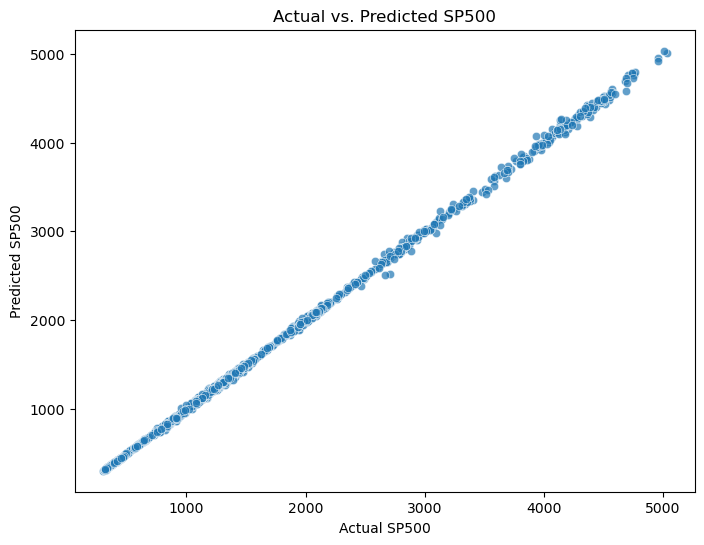

In [ ]:
# Predicting on test data
y_pred = model.predict(X_test_scaled)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print(f"\nModel Performance:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual SP500")
plt.ylabel("Predicted SP500")
plt.title("Actual vs. Predicted SP500")
plt.show()
